In [33]:
import numpy as np
import pandas as pd
from rdkit.Chem import PandasTools
from rdkit import Chem
from utils import load_and_prepCSV, load_and_prepSDF, finalise_dataset

        PUBCHEM_SID  PubChem Standard Value  PUBCHEM_SUBSTANCE_ID  SMILES  \
Active                                                                      
0                26                      26                    26      26   
1                30                      30                    30      30   

        ROMol  
Active         
0          26  
1          30  
        PUBCHEM_SID  PubChem Standard Value  PUBCHEM_SUBSTANCE_ID  SMILES  \
Active                                                                      
0                53                      53                    53      53   
1                14                      14                    14      14   

        ROMol  
Active         
0          53  
1          14  
        PUBCHEM_SID  PubChem Standard Value  PUBCHEM_SUBSTANCE_ID  SMILES  \
Active                                                                      
0                 9                       9                     9       9   
1                17    

,PUBCHEM_SID,PubChem Standard Value,Active,PUBCHEM_SUBSTANCE_ID,SMILES,ROMol
0,103163840.0,17.98870,0,103163840,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,
1,103164548.0,26.30270,0,103164548,CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...,
2,103167027.0,2.29087,1,103167027,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,
3,103167216.0,40.45760,0,103167216,O=C(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1,
4,103170416.0,39.81070,0,103170416,N=C(N)Nc1ccc(C(=O)Oc2ccc3cc(C(=N)N)ccc3c2)cc1,
5,103172458.0,1819.70000,0,103172458,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,
6,103173857.0,269.15300,0,103173857,C[C@H]1CN(CCCn2c3ccccc3c3ccccc32)C[C@@H](C)N1,
7,103175236.0,7762.47000,0,103175236,CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,
8,103177883.0,0.12106,1,103177883,CCCC(CCC)C(=O)O,
9,103181943.0,0.67608,1,103181943,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1,

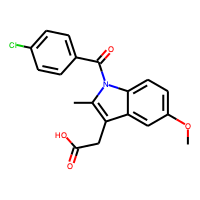
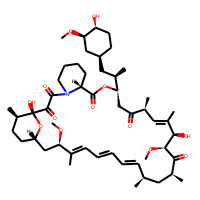
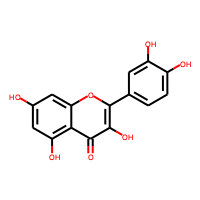
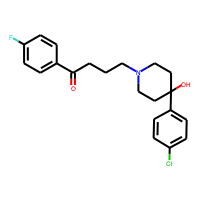
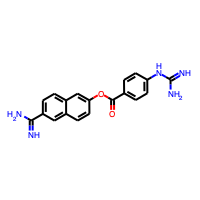
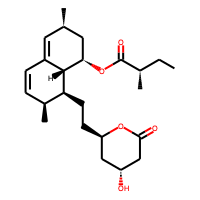
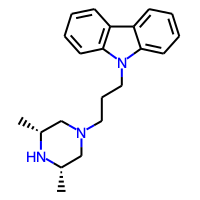
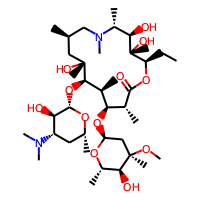
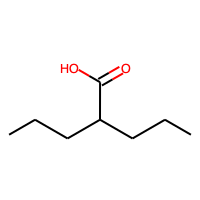
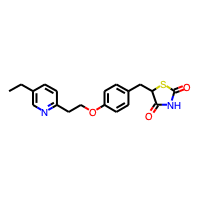
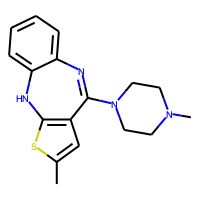
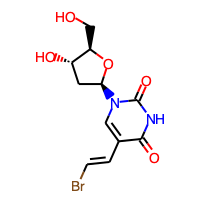
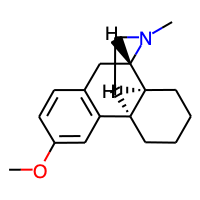
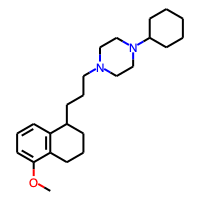
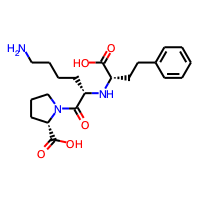
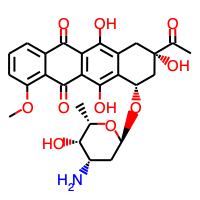
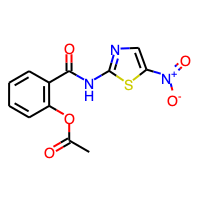
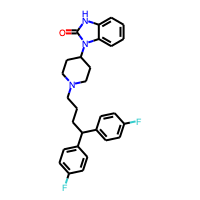
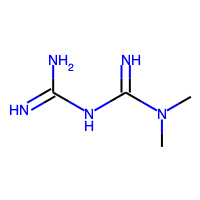
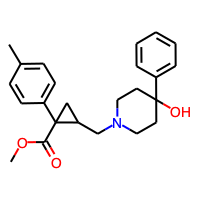
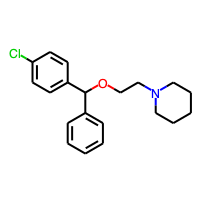
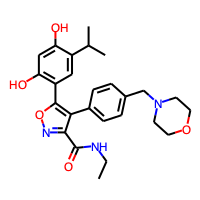
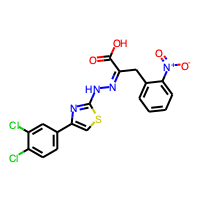
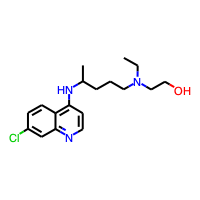
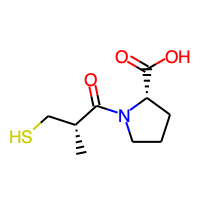
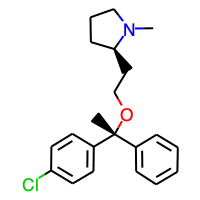
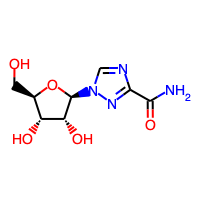
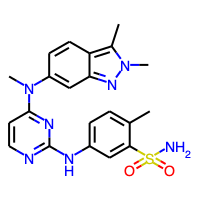
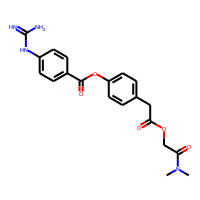
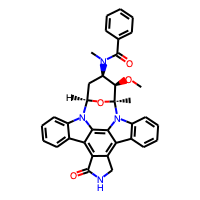
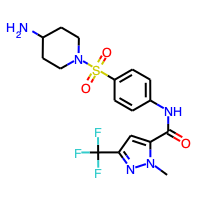
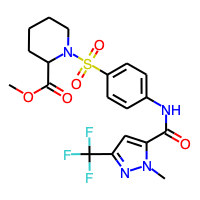
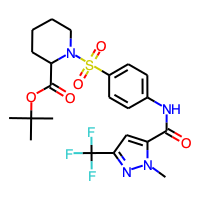
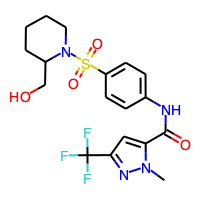
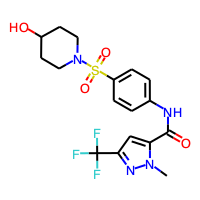
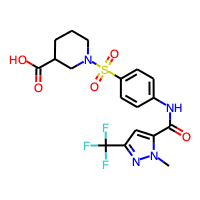
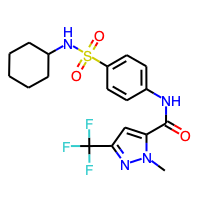
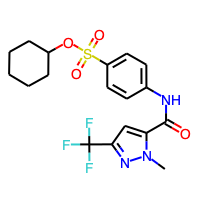
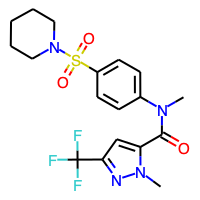
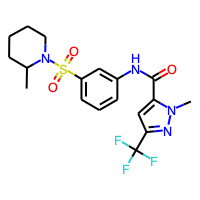
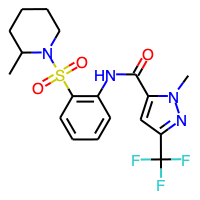
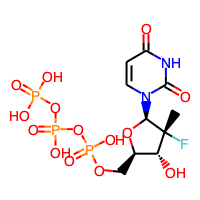
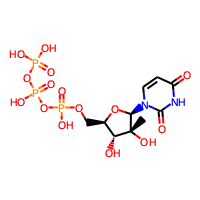
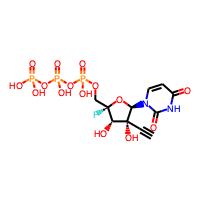
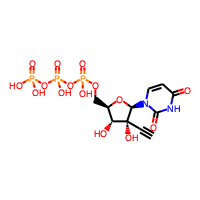
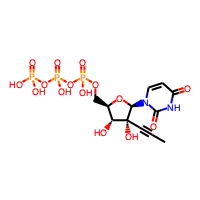
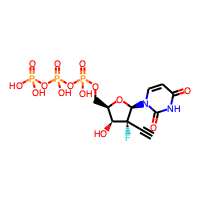
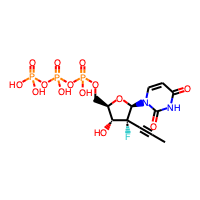
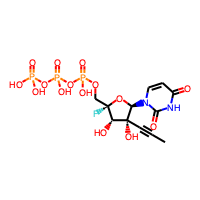
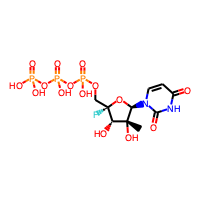
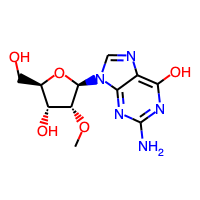
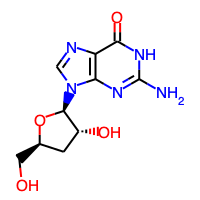
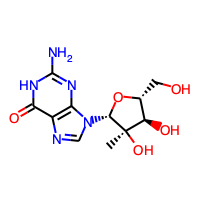
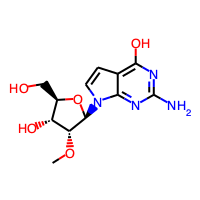
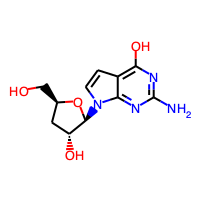
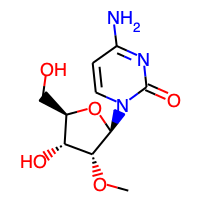
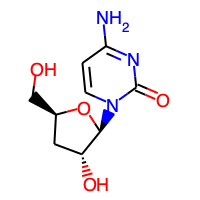
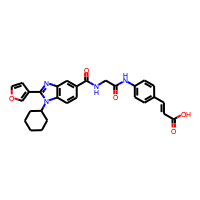
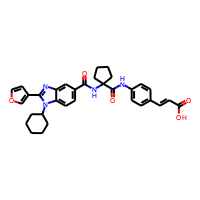
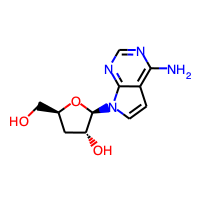

In [34]:
files = {
        "AID_1409607_datatable_all.csv" : "1817399866942882151.sdf",
        "AID_255062_datatable_all.csv" : "1126838623513267552.sdf",
        "AID_1143407_datatable_all.csv" : "3171584971049892057.sdf",
        "AID_1401288_datatable_all.csv" : "3863973400097120853.sdf",
        "AID_1303367_datatable_all.csv" : "851071281757293998.sdf",
        "AID_1456622_datatable_all.csv" : "2003738735470513881.sdf", 
        "AID_642211_datatable_all.csv" : "2651181772145370329.sdf",
        "AID_1152078_datatable_all.csv" : "2613963822972557379.sdf",
        "AID_1294180_datatable_all.csv" : "3634302240315407858.sdf",
        "AID_1450283_datatable_all.csv" : "2210041972286924379.sdf",
        "AID_1450284_datatable_all.csv" : "1480884815989027269.sdf",
        "AID_642209_datatable_all.csv" : "139296334430158244.sdf",
        "AID_499266_datatable_all.csv" : "1448165860219061805.sdf",
        "AID_1450282_datatable_all.csv" : "3598207607357032439.sdf",
        "AID_1301571_datatable_all.csv" : "2296269308750892964.sdf",
        "AID_406927_datatable_all.csv" : "3781163848767027512.sdf", 
        "AID_1497247_datatable_all.csv" : "1471414318853337360.sdf",
        "AID_658631_datatable_all.csv" : "2861051189913574292.sdf"
    }

def load_and_prepSDF2(path):
    SDFFile = path
    pubchem = PandasTools.LoadSDF(SDFFile)
    # Generate SMILES from mol column
    pubchem['SMILES'] = pubchem.apply(lambda x: Chem.MolToSmiles(x['ROMol']), axis=1)
    pubchem = pubchem[['PUBCHEM_SUBSTANCE_ID','SMILES', 'ROMol']]
    return pubchem

training_dataset = []
for csv, sdf in files.items():
    csv_file = f"data/{csv}"
    sdf_file = f"data/{sdf}"
    df = load_and_prepCSV(csv_file)
    # pc = load_and_prepSDF(sdf_file)
    pc = load_and_prepSDF2(sdf_file)
    training = finalise_dataset(df, pc)
    print(training.groupby('Active').count())
    # store dataframes in a list
    training_dataset.append(training)

training_dataset = pd.concat(training_dataset)
training_dataset

In [35]:
training_dataset.dtypes

PUBCHEM_SID               float64
PubChem Standard Value    float64
Active                      int64
PUBCHEM_SUBSTANCE_ID       object
SMILES                     object
ROMol                      object
dtype: object

In [36]:
training_dataset.groupby('Active').count()

,PUBCHEM_SID,PubChem Standard Value,PUBCHEM_SUBSTANCE_ID,SMILES,ROMol
Active,,,,,
0,345,345,344,344,344
1,288,288,288,288,288


,PUBCHEM_SID,PubChem Standard Value,Active,PUBCHEM_SUBSTANCE_ID,SMILES,ROMol
0,103163840.0,17.98870,0,103163840,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,
1,103164548.0,26.30270,0,103164548,CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...,
2,103167027.0,2.29087,1,103167027,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,
3,103167216.0,40.45760,0,103167216,O=C(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1,
4,103170416.0,39.81070,0,103170416,N=C(N)Nc1ccc(C(=O)Oc2ccc3cc(C(=N)N)ccc3c2)cc1,
5,103172458.0,1819.70000,0,103172458,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,
6,103173857.0,269.15300,0,103173857,C[C@H]1CN(CCCn2c3ccccc3c3ccccc32)C[C@@H](C)N1,
7,103175236.0,7762.47000,0,103175236,CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,
8,103177883.0,0.12106,1,103177883,CCCC(CCC)C(=O)O,
9,103181943.0,0.67608,1,103181943,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1,

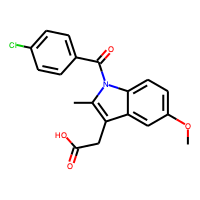
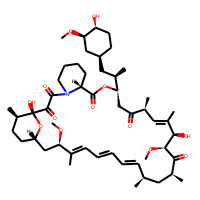
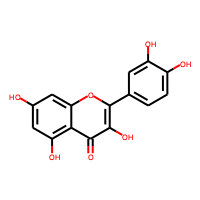
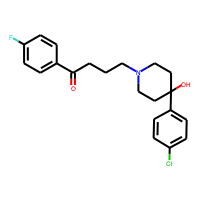
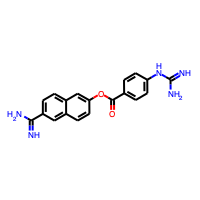
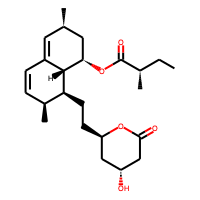
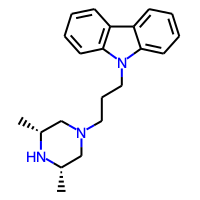
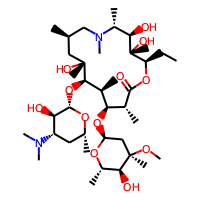
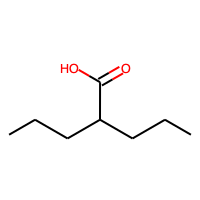
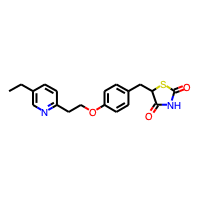
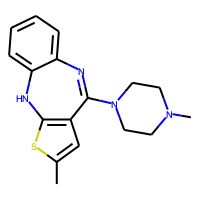
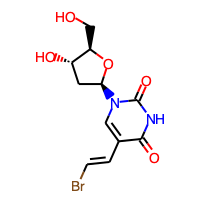
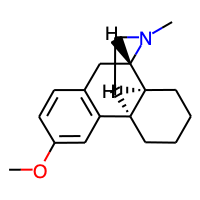
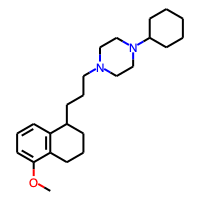
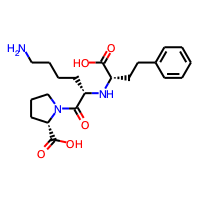
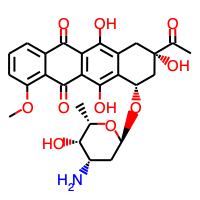
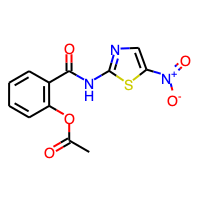
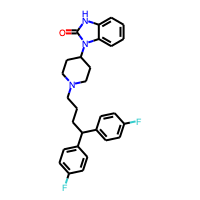
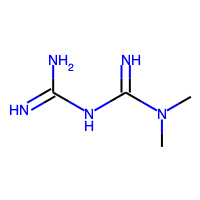
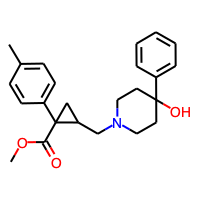
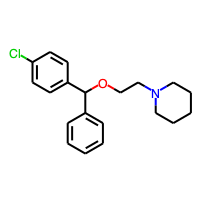
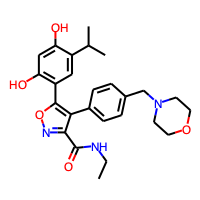
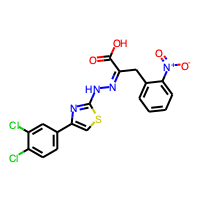
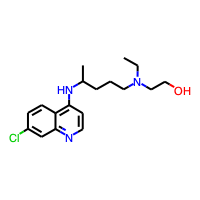
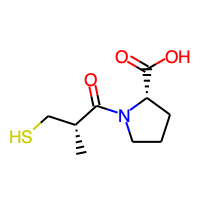
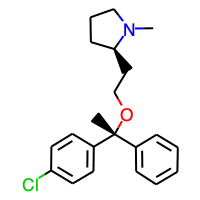
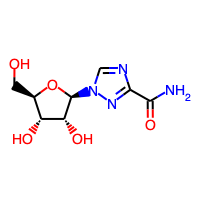
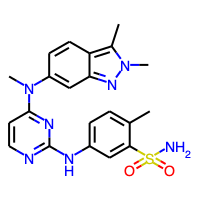
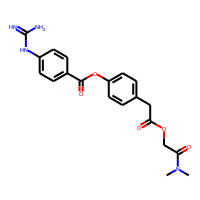
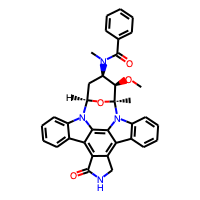
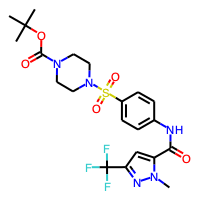
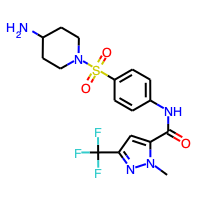
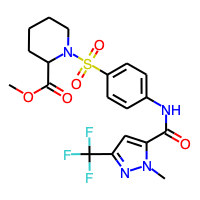
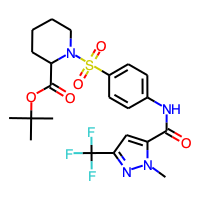
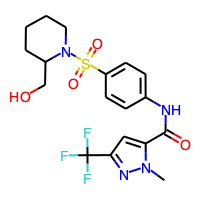
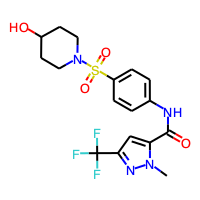
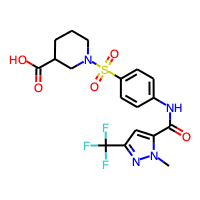
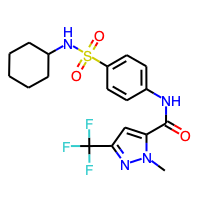
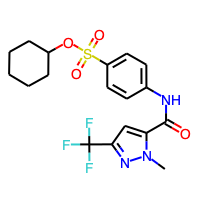
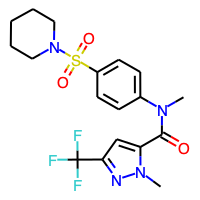
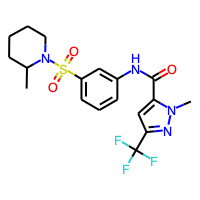
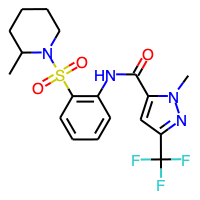
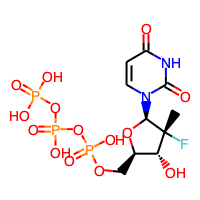
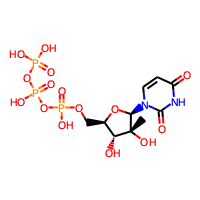
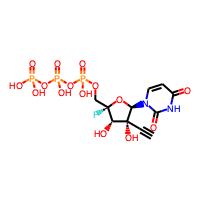
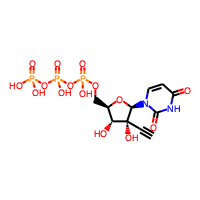
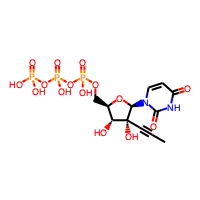
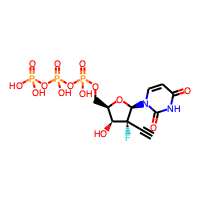
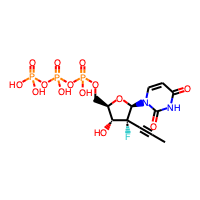
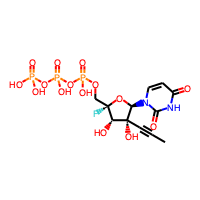
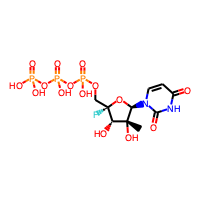
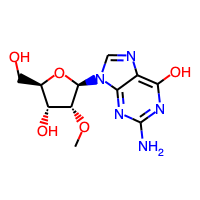
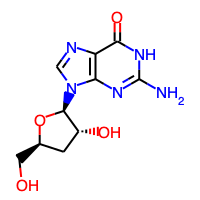
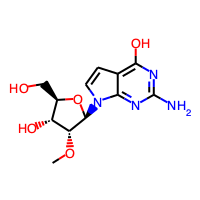
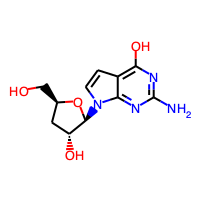
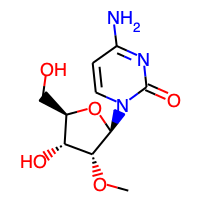
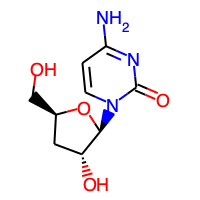
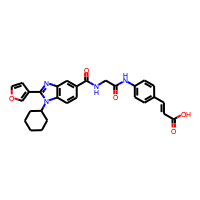
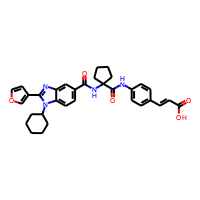
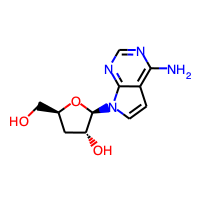

In [38]:
training_dataset = training_dataset.dropna() 
# training_dataset.to_csv(r'trainingdataraw.csv', index = False)
training_dataset

In [37]:
training_dataset = training_dataset.reset_index()
training_dataset = training_dataset[['SMILES', 'Active']]
# Remove additional NaNs
training_dataset = training_dataset.dropna() 
# training_dataset.to_csv(r'trainingdata.csv', index = False)
training_dataset

,SMILES,Active
0,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,0
1,CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...,0
2,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,1
3,O=C(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1,0
4,N=C(N)Nc1ccc(C(=O)Oc2ccc3cc(C(=N)N)ccc3c2)cc1,0
5,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,0
6,C[C@H]1CN(CCCn2c3ccccc3c3ccccc32)C[C@@H](C)N1,0
7,CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,0
8,CCCC(CCC)C(=O)O,1
9,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1,1


# Analyse distribution of IC50 values

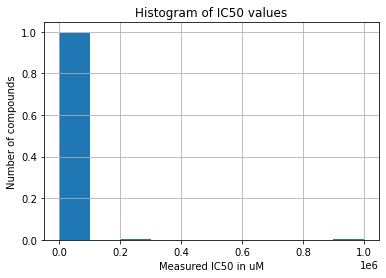

In [12]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
training_dataset = pd.read_csv("data/trainingdataraw.csv", header=0)
fig = plt.figure()
ax = fig.add_subplot(111)
ic50 = np.array(training_dataset["PubChem Standard Value"])
# n, bins, patches = plt.hist(ic50, 20, facecolor='green', alpha=0.75)
n, bins, patches = ax.hist(ic50, weights=np.zeros_like(ic50) + 1. / ic50.size)
plt.xlabel('Measured IC50 in uM')
plt.ylabel('Number of compounds')
# plt.xlim(xmin=0, xmax = 1)
plt.title(r'Histogram of IC50 values')
plt.grid(True)
plt.show()

,PUBCHEM_SID,PubChem Standard Value,Active,PUBCHEM_SUBSTANCE_ID,SMILES,ROMol
0,103163840.0,17.98870,0,103163840,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,
1,103164548.0,26.30270,0,103164548,CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...,
2,103167027.0,2.29087,1,103167027,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,
3,103167216.0,40.45760,0,103167216,O=C(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1,
4,103170416.0,39.81070,0,103170416,N=C(N)Nc1ccc(C(=O)Oc2ccc3cc(C(=N)N)ccc3c2)cc1,
5,103172458.0,1819.70000,0,103172458,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,
6,103173857.0,269.15300,0,103173857,C[C@H]1CN(CCCn2c3ccccc3c3ccccc32)C[C@@H](C)N1,
7,103175236.0,7762.47000,0,103175236,CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,
8,103177883.0,0.12106,1,103177883,CCCC(CCC)C(=O)O,
9,103181943.0,0.67608,1,103181943,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1,

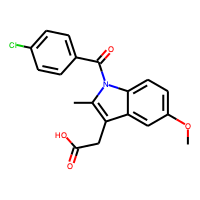
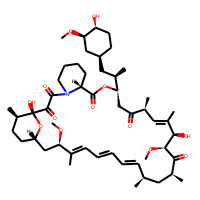
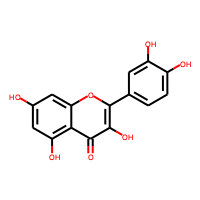
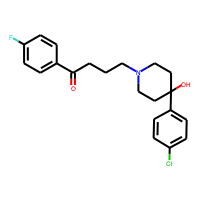
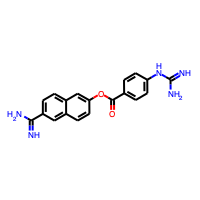
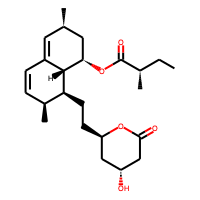
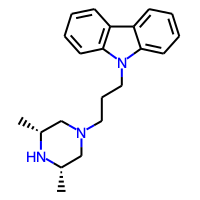
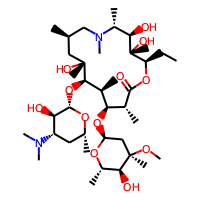
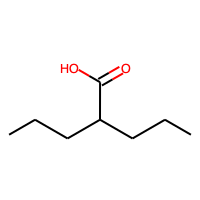
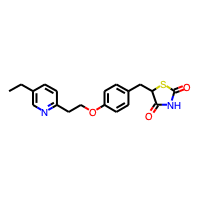
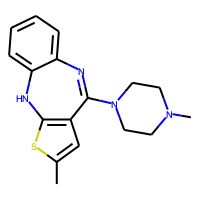
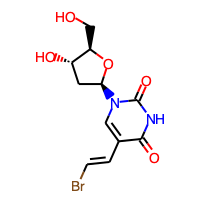
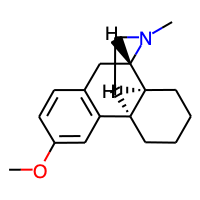
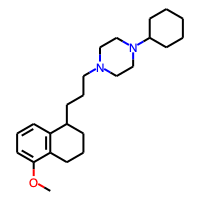
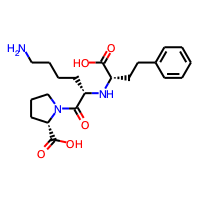
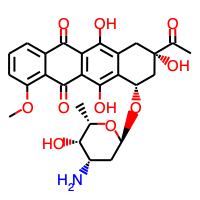
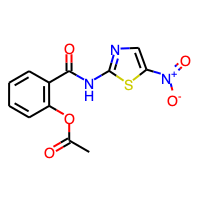
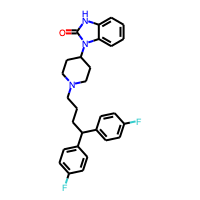
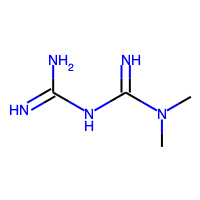
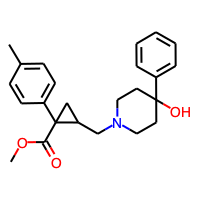
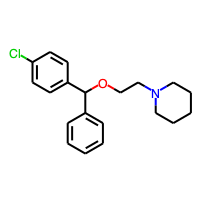
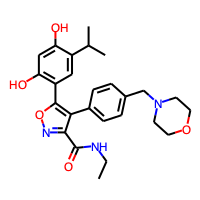
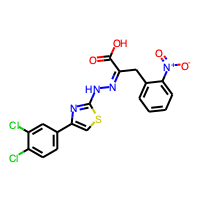
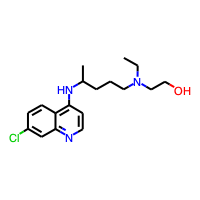
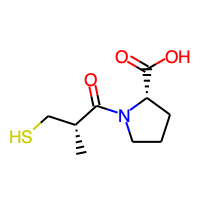
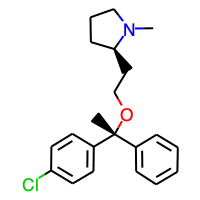
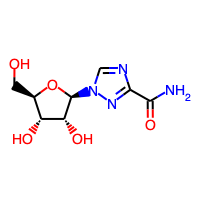
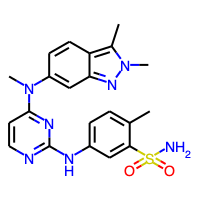
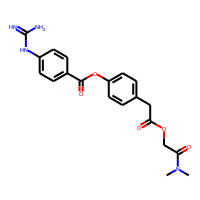
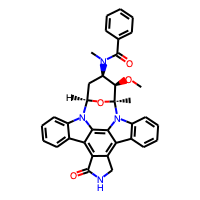
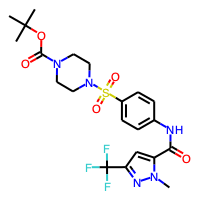
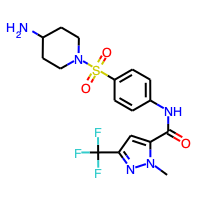
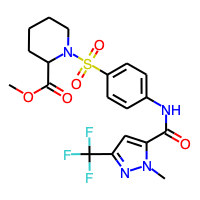
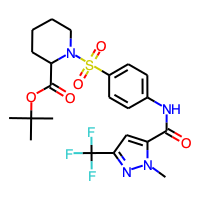
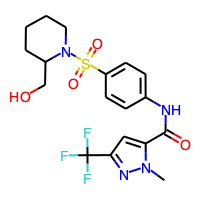
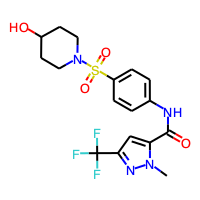
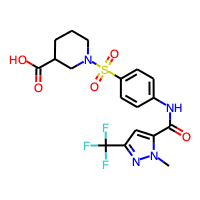
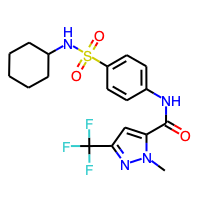
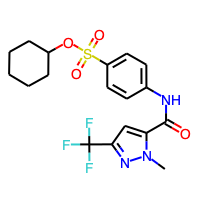
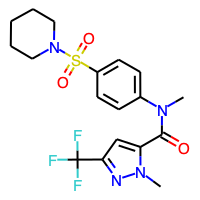
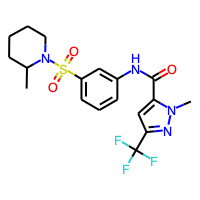
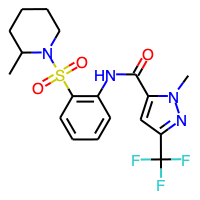
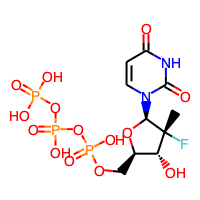
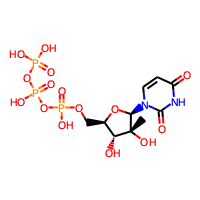
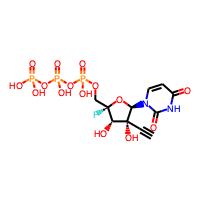
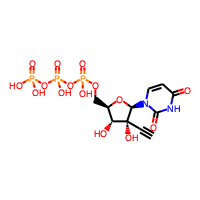
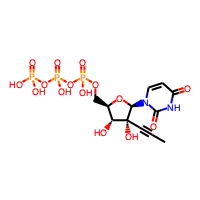
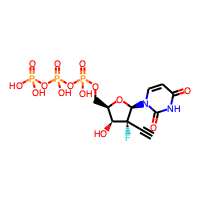
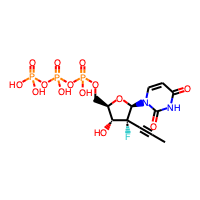
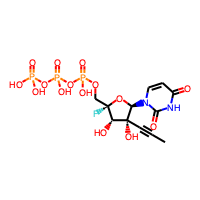
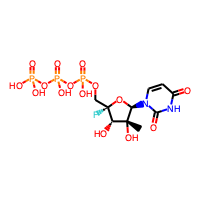
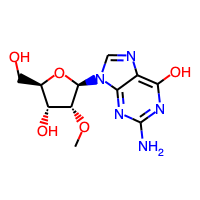
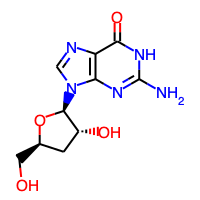
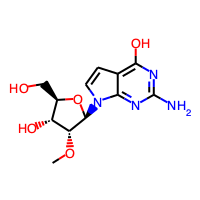
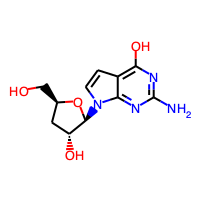
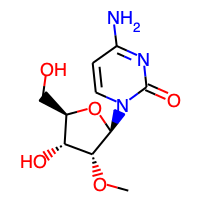
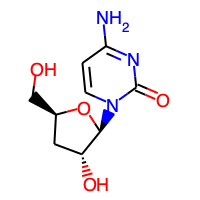
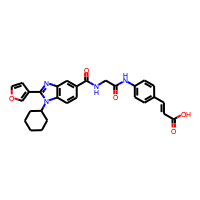
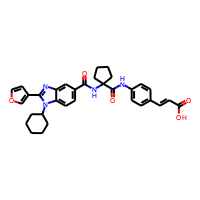
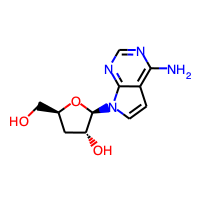

In [37]:
# duplicateRowsDF = training_dataset[training_dataset.duplicated(subset="PUBCHEM_SID", keep='first')]
# duplicateRowsDF = training_dataset[training_dataset.duplicated(['PUBCHEM_SID'])]
# print(duplicateRowsDF)

# Remove duplicate SMILES
training_dataset = training_dataset.drop_duplicates(subset ="SMILES", 
                     keep = 'first') 
training_dataset

# PCA Latent Space Analysis

In [39]:
import pandas as pd
import numpy as np
import altair as alt

from rdkit import Chem
from rdkit import rdBase
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
from rdkit.Chem import PandasTools
from rdkit.Chem import RDConfig
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

from sklearn.decomposition import PCA

,PUBCHEM_SUBSTANCE_ID,Active,SMILES,ROMol
0,103163840,0,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,
1,103164548,0,CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...,
2,103167027,1,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,
3,103167216,0,O=C(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1,
4,103170416,0,N=C(N)Nc1ccc(C(=O)Oc2ccc3cc(C(=N)N)ccc3c2)cc1,
5,103172458,0,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,
6,103173857,0,C[C@H]1CN(CCCn2c3ccccc3c3ccccc32)C[C@@H](C)N1,
7,103175236,0,CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,
8,103177883,1,CCCC(CCC)C(=O)O,
9,103181943,1,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1,

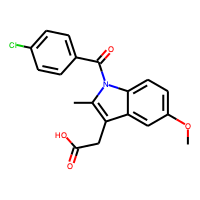
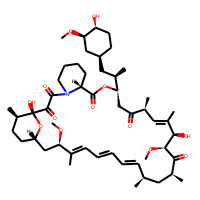
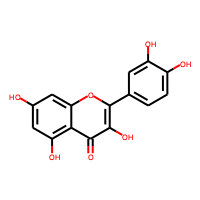
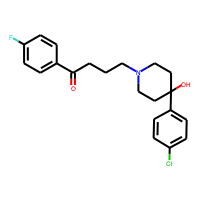
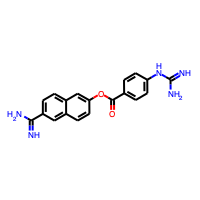
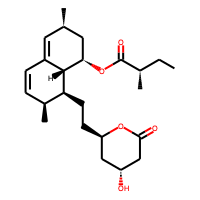
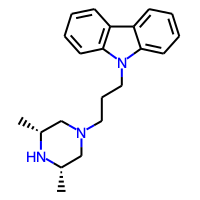
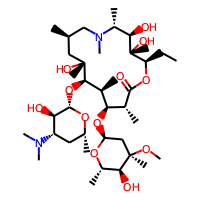
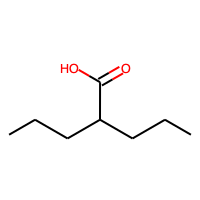
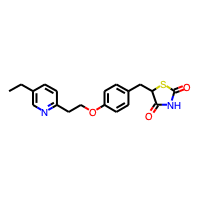
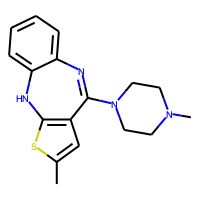
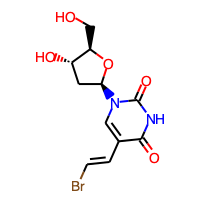
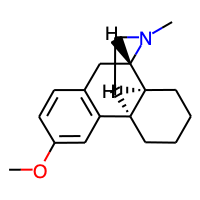
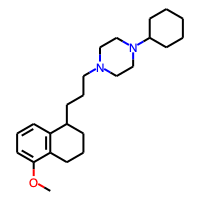
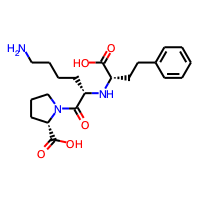
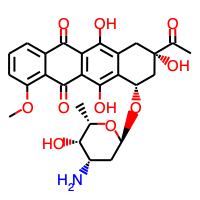
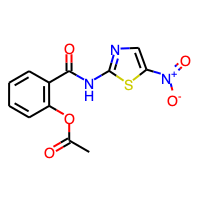
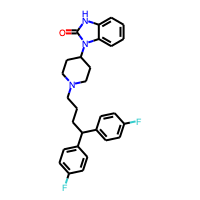
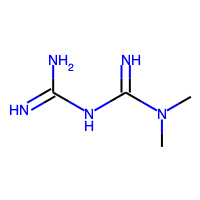
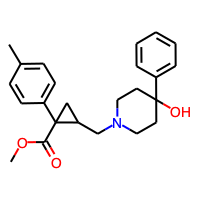
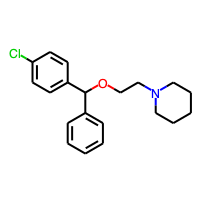
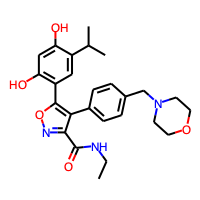
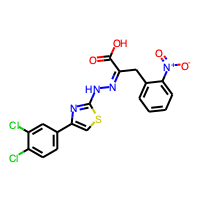
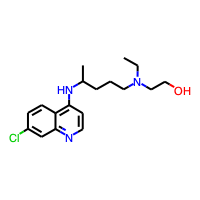
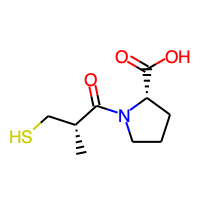
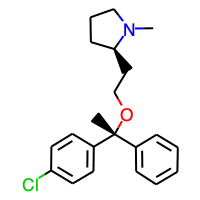
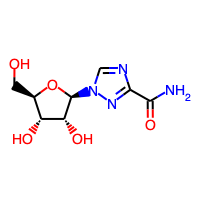
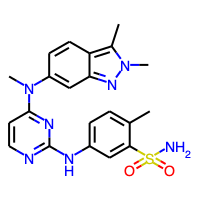
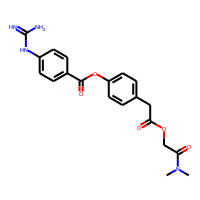
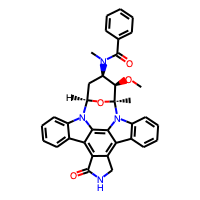
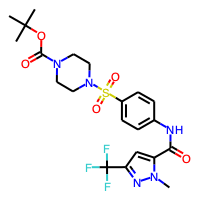
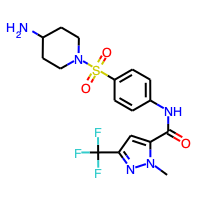
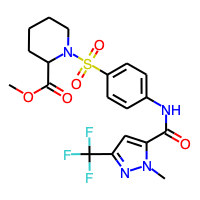
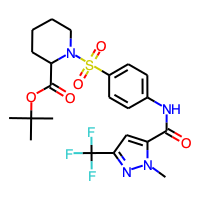
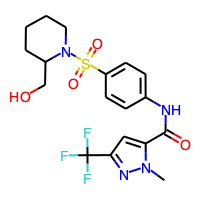
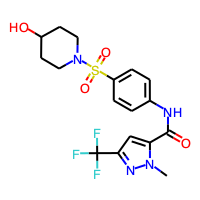
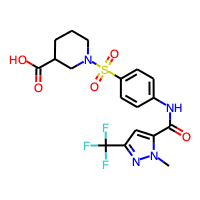
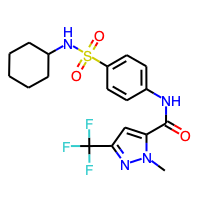
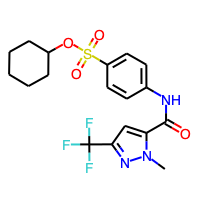
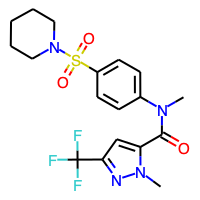
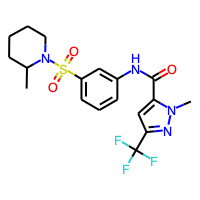
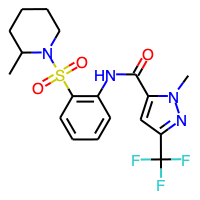
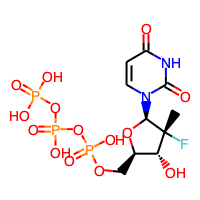
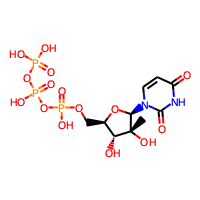
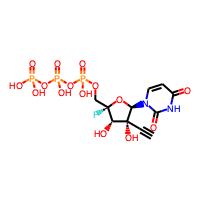
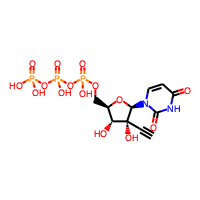
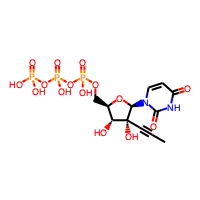
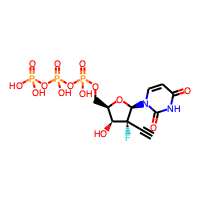
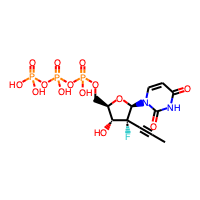
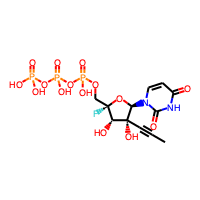
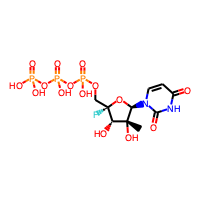
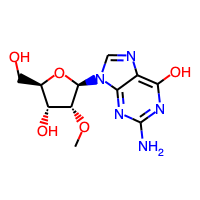
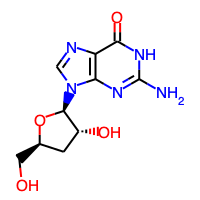
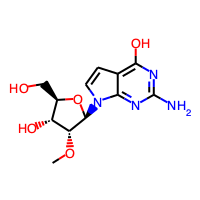
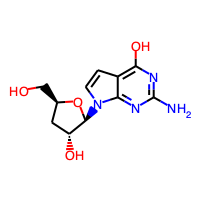
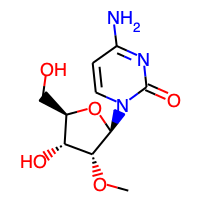
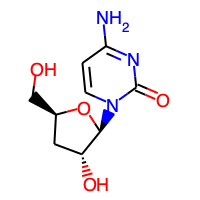
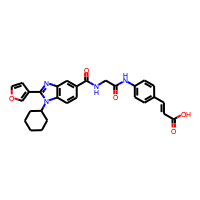
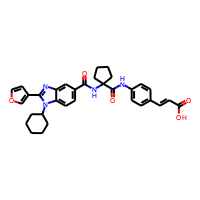
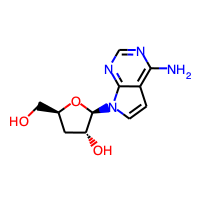

In [57]:
dataset = training_dataset[['PUBCHEM_SUBSTANCE_ID', 'Active', 'SMILES', 'ROMol']]
dataset

In [58]:
def mol2fparr(mol):
    arr = np.zeros((0,))
    fp = AllChem.GetMorganFingerprintAsBitVect(mol,2)
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

In [64]:
pca = PCA(n_components=2)
np.sum(pca.explained_variance_ratio_)

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

,PUBCHEM_SUBSTANCE_ID,Active,SMILES,ROMol
0,103163840,0,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,
1,103164548,0,CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...,
2,103167027,1,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,
3,103167216,0,O=C(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1,
4,103170416,0,N=C(N)Nc1ccc(C(=O)Oc2ccc3cc(C(=N)N)ccc3c2)cc1,

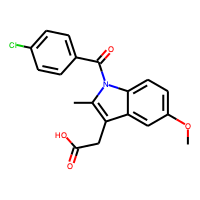
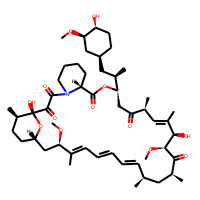
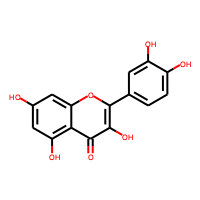
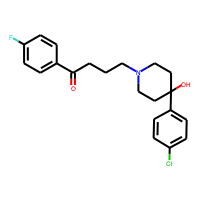
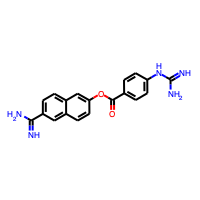

In [60]:
dataset.head()

In [62]:
X = np.asarray([mol2fparr(mol) for mol in dataset['ROMol']])
print(X.shape)
res = pca.fit_transform(X)
print(res.shape)
dataset['PCA1'] = res[:,0]
dataset['PCA2'] = res[:,1]
dataset = dataset[['PUBCHEM_SUBSTANCE_ID', 'PCA1', 'PCA2', 'SMILES' , 'Active']]
# training_dataset = training_dataset[['PCA1', 'PCA2', 'SMILES' ]]
dataset['Active'] = ["{:0=2}".format(int(cls)) for cls in dataset.loc[:,'Active']]

(488, 2048)
(488, 2)


/Users/EstherBarlow-Smith/opt/miniconda3/envs/my-rdkit-env/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/EstherBarlow-Smith/opt/miniconda3/envs/my-rdkit-env/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [63]:
alt.Chart(dataset).mark_point().encode(
           x = 'PCA1',
           y = 'PCA2',
           color = 'Active',
           tooltip = ['PUBCHEM_SUBSTANCE_ID', 'SMILES']).interactive()

alt.Chart(...)

In [68]:
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
# plot appearance
sns.set(rc={'figure.figsize': (10, 10)})
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

,PUBCHEM_SID,PubChem Standard Value,Active,PUBCHEM_SUBSTANCE_ID,SMILES,ROMol
0,103163840.0,17.98870,0,103163840,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,
1,103164548.0,26.30270,0,103164548,CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...,
2,103167027.0,2.29087,1,103167027,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,
3,103167216.0,40.45760,0,103167216,O=C(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1,
4,103170416.0,39.81070,0,103170416,N=C(N)Nc1ccc(C(=O)Oc2ccc3cc(C(=N)N)ccc3c2)cc1,

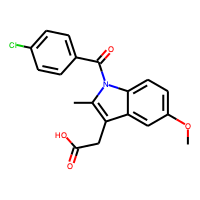
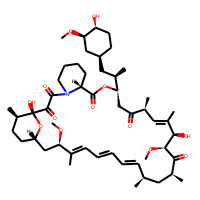
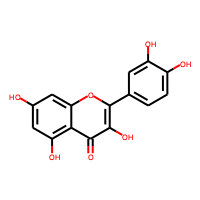
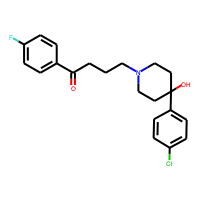
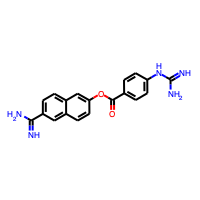

In [70]:
training_dataset.head()

In [71]:
# functions to convert SMILES list to list of fingerprints
def fp_list_from_smiles_list(smiles_list,n_bits=2048):
    fp_list = []
    for smiles in tqdm(smiles_list):
        mol = Chem.MolFromSmiles(smiles)
        fp_list.append(fp_as_array(mol,n_bits))
    return fp_list

def fp_as_array(mol,n_bits=2048):
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=n_bits)
    arr = np.zeros((1,), np.int)
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

In [73]:
fp_list = fp_list_from_smiles_list(training_dataset.SMILES)

100%|██████████| 488/488 [00:00<00:00, 569.06it/s]


In [74]:
# PCA on the fingerprints 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
crds = pca.fit_transform(fp_list)

In [75]:
# Put coords from PCA into the dataframe
crds_df = pd.DataFrame(crds,columns=["PC_1","PC_2"])
crds_df['Active'] = list(training_dataset.Active)
crds_df.head()

,PC_1,PC_2,Active
0,-0.599903,-0.362576,0
1,0.363051,-0.281409,0
2,-0.403951,-1.009181,1
3,-0.494167,-0.211196,0
4,-0.390910,0.370498,0


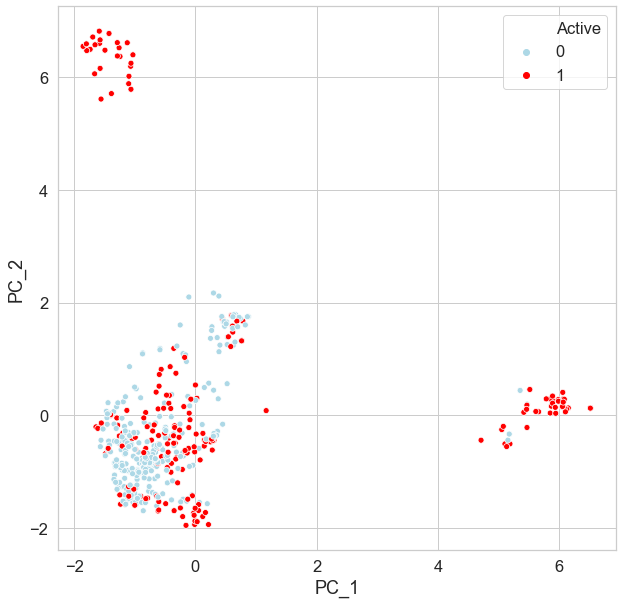

In [76]:
# Plot the principal components
ax = sns.scatterplot(data=crds_df,x="PC_1",y="PC_2",hue="Active",palette={0:'lightblue',1:'red'})

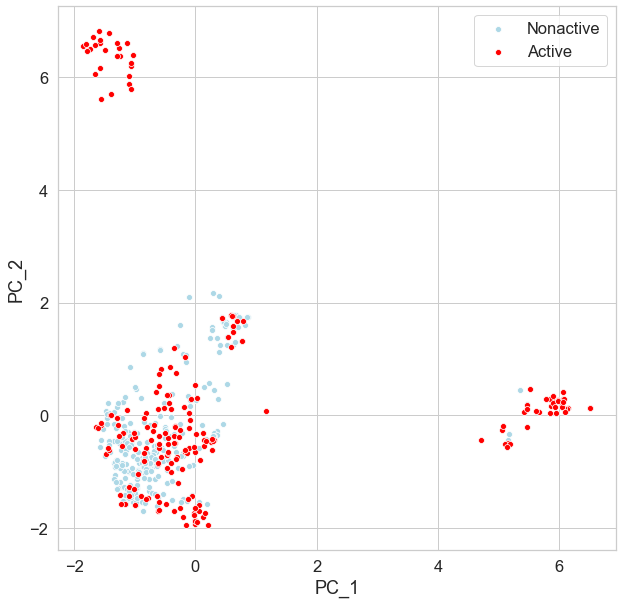

In [77]:
# Plot in 2 steps so actives are more visible
ax = sns.scatterplot(data=crds_df.query("Active == 0"),x="PC_1",y="PC_2",color='lightblue')
ax = sns.scatterplot(data=crds_df.query("Active == 1"),x="PC_1",y="PC_2",color='red')
_ = plt.legend(labels=['Nonactive', 'Active'])

In [78]:
# Look at fraction of overall variance explained by the 2 principal components
var = np.sum(pca.explained_variance_ratio_)
var
# 18% overall variance isnt great

0.18295940045457812

In [79]:
# Function to evaluate variance explained between 5 - 20 principal components
def evaluate_components(fp_list):
    res = []
    for n_comp in tqdm(range(2,50)):
        pca = PCA(n_components=n_comp)
        crds = pca.fit_transform(fp_list)
        var = np.sum(pca.explained_variance_ratio_)
        res.append([n_comp,var])
    return res

In [80]:
comp_res = evaluate_components(fp_list)

100%|██████████| 48/48 [00:06<00:00,  7.79it/s]


In [82]:
# Put results into a dataframe
res_df = pd.DataFrame(comp_res,columns=["Components","Variance"])
res_df.head()

,Components,Variance
0,2,0.182959
1,3,0.245993
2,4,0.297792
3,5,0.341953
4,6,0.382196


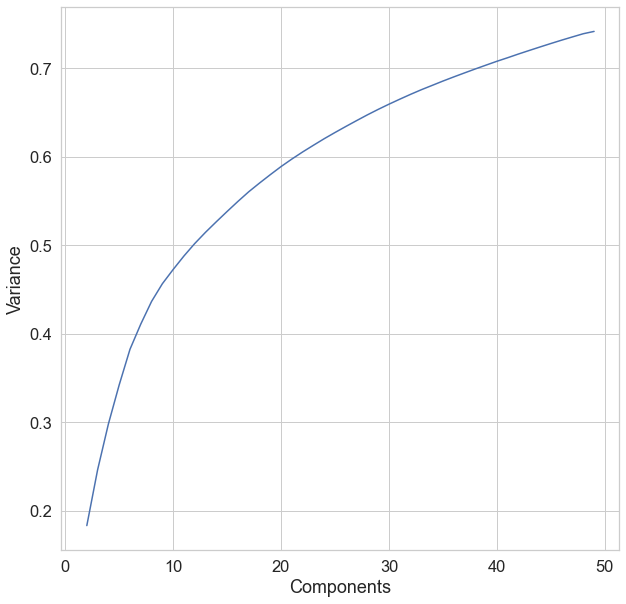

In [83]:
# Plot num of components vs Variance explained
ax = sns.lineplot(data=res_df,x="Components",y="Variance")

In [85]:
# How does plot vary with number of bits in a fingerprint
# Try for 2048, 1024 & 512 bits
fp_2048 = fp_list
fp_1024 = fp_list_from_smiles_list(training_dataset.SMILES,1024)
fp_512 = fp_list_from_smiles_list(training_dataset.SMILES,512)

100%|██████████| 488/488 [00:00<00:00, 1588.94it/s]


In [86]:
# Evaluate variance explained as a fn of 
# number of principal components for each fingerprint list
res_2048 = evaluate_components(fp_2048)
res_1024 = evaluate_components(fp_1024)
res_512 = evaluate_components(fp_512)

100%|██████████| 48/48 [00:01<00:00, 30.67it/s]


In [87]:
# Put into dataframe
df_2048 = pd.DataFrame(res_2048,columns=["Components","Variance"])
df_2048['Bits'] = '2048 Bits'
df_1024 = pd.DataFrame(res_1024,columns=["Components","Variance"])
df_1024['Bits'] = '1024 Bits'
df_512 = pd.DataFrame(res_512,columns=["Components","Variance"])
df_512['Bits'] = '512 Bits'
combo_df = pd.concat([df_2048,df_1024,df_512])

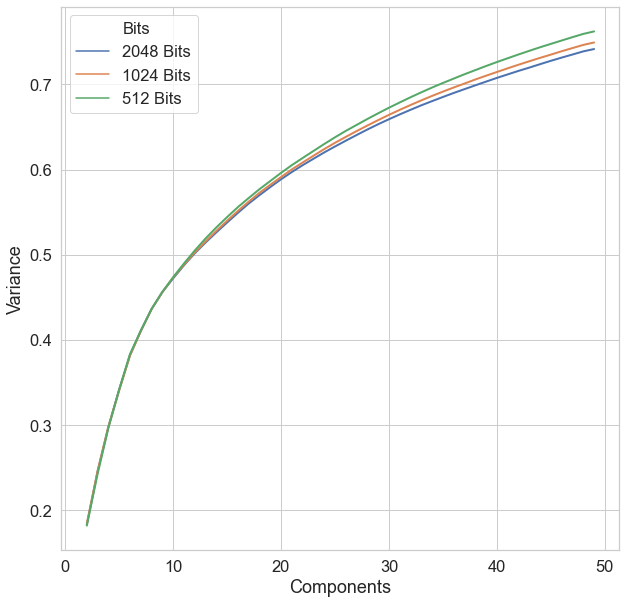

In [88]:
# Plot impact of fingerprint length on variance explained
ax = sns.lineplot(x="Components",y="Variance",hue="Bits",data=combo_df,linewidth=2)

# TSNE

In [89]:
pca = PCA(n_components=50)
crds = pca.fit_transform(fp_list)

In [90]:
from sklearn.manifold import TSNE
# Run the t-sne on the 50 principal components
%time crds_embedded = TSNE(n_components=2).fit_transform(crds)

CPU times: user 7.97 s, sys: 838 ms, total: 8.81 s
Wall time: 9.47 s


In [96]:
tsne_df = pd.DataFrame(crds_embedded,columns=["X","Y"])
# training_dataset = training_dataset.reset_index()
tsne_df['Active'] = training_dataset['Active']
tsne_df.head()

,X,Y,Active
0,0.149892,2.981762,0
1,3.979391,-4.967022,0
2,-1.141048,-0.883480,1
3,3.686496,-1.408047,0
4,-0.728308,0.776948,0


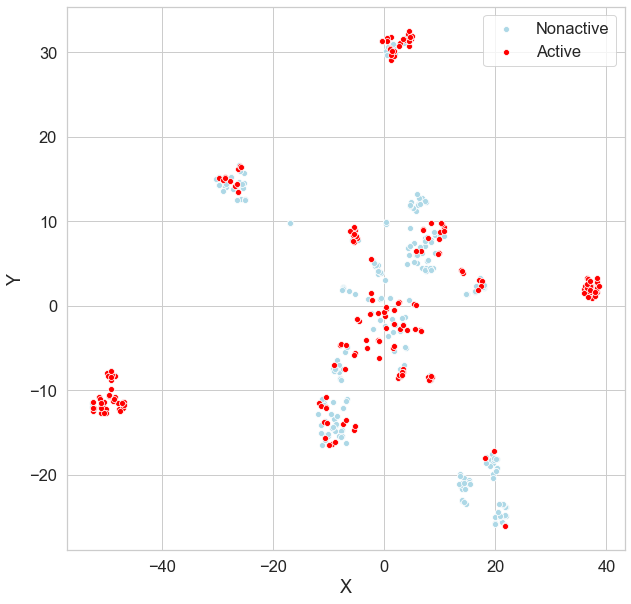

In [100]:
# Plot the distribution of molecules with t-sne (do 2 steps to avoid obscuring active points)
ax = sns.scatterplot(data=tsne_df.query("Active == 0"),x="X",y="Y",color='lightblue')
ax = sns.scatterplot(data=tsne_df.query("Active == 1"),x="X",y="Y",color='red')
_ = plt.legend(labels=['Nonactive', 'Active'])

In [98]:
# Create new dataframe with desired data
output_tsne_df = pd.concat([training_dataset["PUBCHEM_SID"],crds_df[["PC_1","PC_2"]],tsne_df[["X","Y"]]],axis=1)
output_tsne_df.head()

,PUBCHEM_SID,PC_1,PC_2,X,Y
0,103163840.0,-0.599903,-0.362576,0.149892,2.981762
1,103164548.0,0.363051,-0.281409,3.979391,-4.967022
2,103167027.0,-0.403951,-1.009181,-1.141048,-0.883480
3,103167216.0,-0.494167,-0.211196,3.686496,-1.408047
4,103170416.0,-0.390910,0.370498,-0.728308,0.776948


In [99]:
output_tsne_df.to_csv(r'tnse.csv',index=False)